####LifeLux Inc, a consumer goods company sells variety products through various retail channels. Over the years, they have invested a lot in television, radio, newspaper advertisement to drive sales and increase brand awareness. The company recently has become concerned about the effectiveness of its advertising spend, as it  is becoming difficult to measure the return on investment for each advertising channel. In order to better understand the relationship between advertisement and unit sales, the company has task us to build a model that will effectively predict unit sales based on the amount spent on TV, Radio and newspaper advertisement

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("datahub\Advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


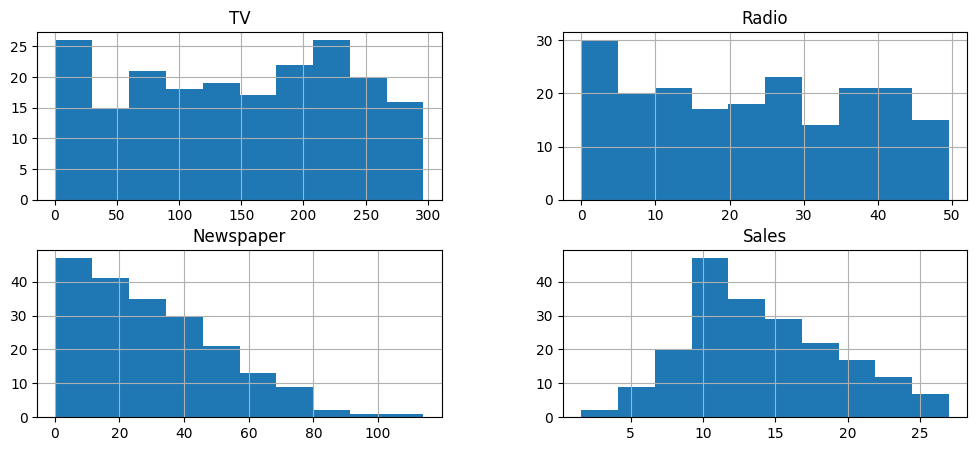

In [12]:
df.hist(figsize=(12,5));

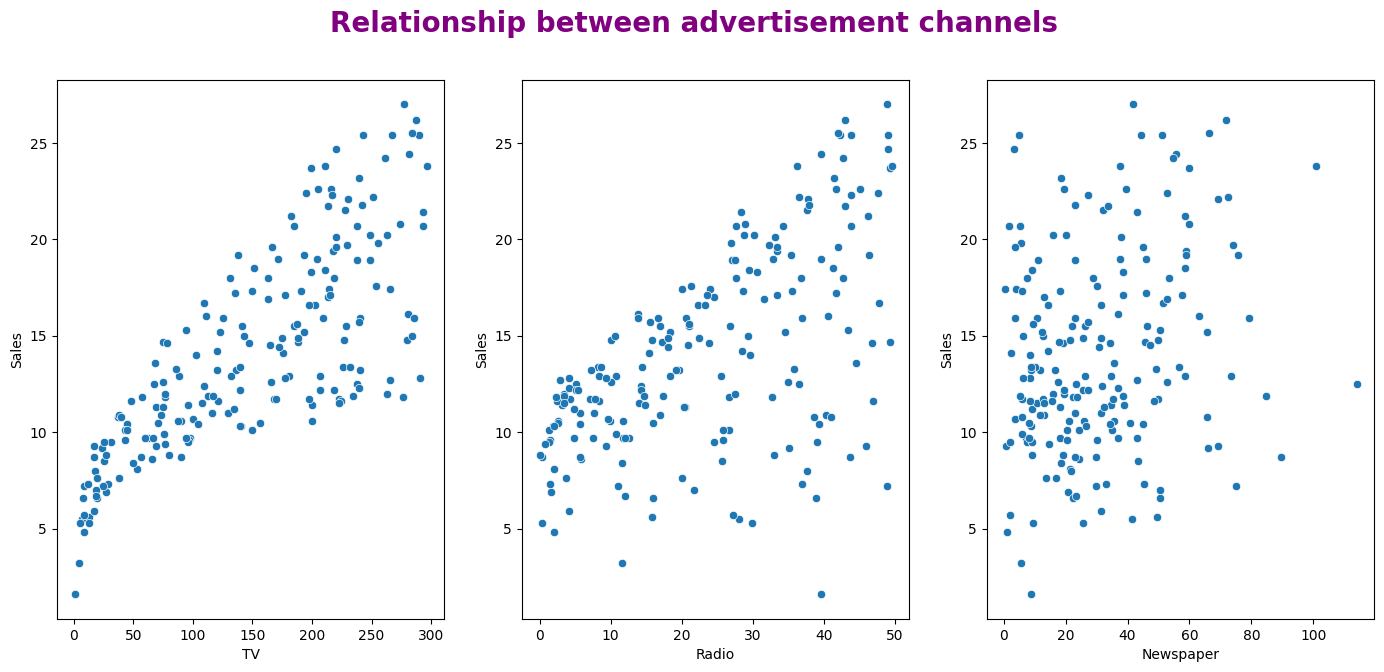

In [34]:
fig,axes = plt.subplots(nrows=1,ncols =3,figsize=(17,7))
sns.scatterplot(data=df,x="TV",y="Sales", ax=axes[0]);#0 indicates where the plot should be done 
sns.scatterplot(data=df, x="Radio",y="Sales",ax=axes[1]);
sns.scatterplot(data=df,x="Newspaper",y="Sales",ax=axes[2]);
title = fig.suptitle("Relationship between advertisement channels", fontweight = "bold", color="purple",fontsize=20)
title.set_position=(0.5,0.95)
#plt.savefig("trend.png")

In [35]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
X=df.drop('Sales',axis=1)
y=df["Sales"]

In [37]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [38]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
X_train.head()

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5


In [45]:
X_test.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [49]:
X_train.shape

(140, 3)

In [50]:
len(df)*70/100

140.0

In [51]:
X_test.shape

(60, 3)

In [52]:
len(df)*30/100

60.0

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train,y_train)

LinearRegression()

In [56]:
pred =model.predict(X_test)

In [57]:
pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [62]:
#y_test
y_test[:5]

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [63]:
residual = y_test - pred

In [66]:
np.abs(residual).head()

95     0.334604
15     1.211772
30     0.151071
158    3.589238
128    2.497680
Name: Sales, dtype: float64

In [67]:
np.mean(np.abs(residual)) # This is the performance of our machine 

1.5116692224549086

In [69]:
np.mean(residual ** 2 )

3.79679723671522

In [70]:
mean_squared_error(y_test,pred)

3.79679723671522

In [71]:
y.mean()

14.0225

In [72]:
(1.51/14)*100 # Depicts a 10% error in our prediction 

10.785714285714286

In [ ]:
$ y =B_2 * TV + B_1 * Radio + B_0 * Newspaper

In [75]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [76]:
#
0.04405928 * 42

1.8504897599999999

In [77]:
0.1992875 * 42 # We have to focus more on radio advertisment sinces it contributes more to sales 

8.370075

In [78]:
0.00688245 * 42

0.2890629

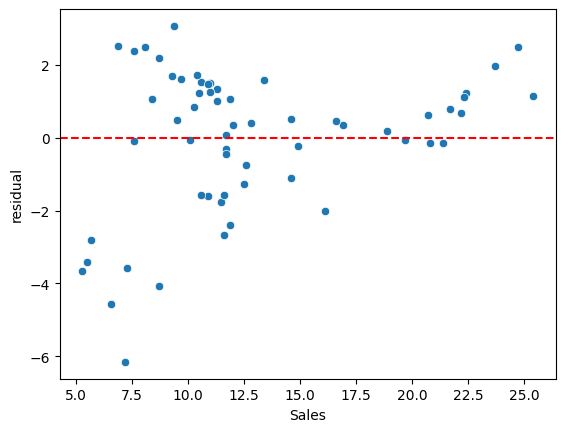

In [85]:
#The difference between the actual and predicted 
sns.scatterplot(x=y_test,y=residual)
plt.axhline(y=0,c="red",ls="--")
plt.ylabel("residual"); # If it is a good fit all the points must be on the residual line 

In [87]:
all_X = model.predict(X)

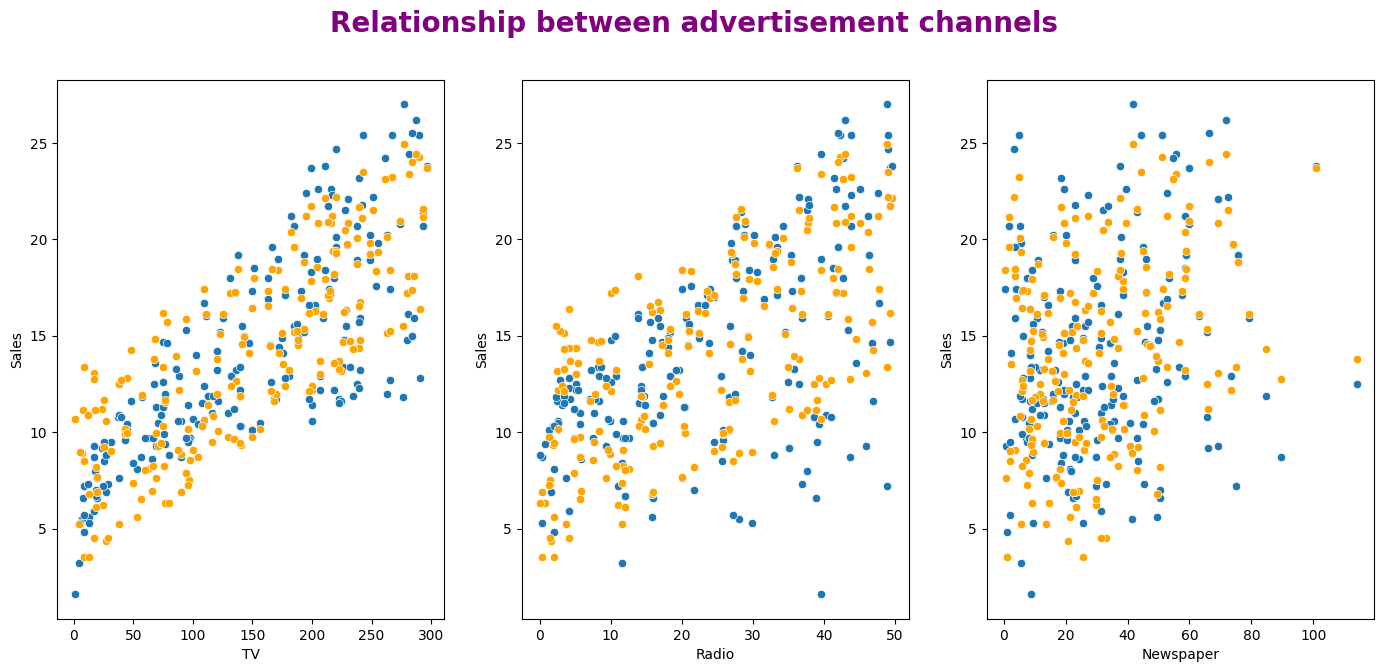

In [89]:
fig,axes = plt.subplots(nrows=1,ncols =3,figsize=(17,7))
sns.scatterplot(data=df,x="TV",y="Sales", ax=axes[0]);#0 indicates where the plot should be done
sns.scatterplot(data=df,x="TV",y=all_X,color="orange", ax=axes[0])

sns.scatterplot(data=df, x="Radio",y="Sales",ax=axes[1]);
sns.scatterplot(data=df, x="Radio",y=all_X,color="orange",ax=axes[1]);

sns.scatterplot(data=df,x="Newspaper",y="Sales",ax=axes[2]);
sns.scatterplot(data=df,x="Newspaper",y=all_X,color="orange",ax=axes[2]);
title = fig.suptitle("Relationship between advertisement channels", fontweight = "bold", color="purple",fontsize=20)
title.set_position=(0.5,0.95)

In [90]:
# Save the model and share with someone
final_model = LinearRegression()

In [91]:
final_model.fit(X,y)

LinearRegression()

In [92]:
from joblib import dump,load

In [93]:
dump(final_model,"advert_sales_predictor.joblib")

['advert_sales_predictor.joblib']

In [94]:
loaded_model = load("advert_sales_predictor.joblib")

In [95]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [99]:
nxt_camp = [[25,35,12]]

In [100]:
loaded_model.predict(nxt_camp) # Loaded model in use for a new campaign

C:\Users\otchi\data_analytics\virenv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.66910618])

In [102]:
tst=pd.DataFrame(nxt_camp,columns=["TV","Radio","Newspaper"])

In [103]:
loaded_model.predict(tst)

array([10.66910618])